#O teste $X^2$ de Bartlett



É necessário garantir que as amostras serão normais e seguirão a qui-quadrada.

Além disso, ele só será usado para 3 ou mais grupos.


Devemos definir a hipótese a ser testada sobre o parâmetro k dessa população, que é chamada de hipótese nula:

(as variâncias dos erros são homogêneas)
$$H_0 : \sigma^2_1 = \sigma^2_2 = \sigma^2_3 = \sigma^2_k$$

Definiremos também a hipótese alternativa $(H_1)$: existem pelo menos um i e um j tais que:

(as variâncias dos erros não são homogêneas)
$$H_1 :\sigma^2_i \neq \sigma^2_j $$


A Bcalc (estatística de Bortlett) é dado por:

$$Bcalc = \frac{q}{c} ~~com~~distribuição~~ X^2_{k-1+\alpha}$$



Regra de Decisão:

$Bcalc > X^2_{c},$ rejeitamos $H_{0}$

$Bcalc <= X^2_{c},$ aceitamos $H_{0}$

Se $p <= \alpha,$ rejeitamos $H_{0}$

Sendo:

$S^2_{i}$ = Variância de cada amostra

$n_{i}$ variando para i = 1, ..., k

$S^2_{p} = \frac{\sum^k_{i=1}(n_{i}-1)S^2_{i}}{N-k}$

$N = \sum^k_{i=1} ni$

o fator de correção aplicado a q: $c = 1 + \frac{1}{3(k-1)}(\sum^k_{i=1}(\frac{1}{n_{i}-1}) - \frac{1}{N-k})$

A estatística de Teste: $ q = \frac{(N - k) log_{e}(S^2_{p}) - \sum^k_{i=1}(n_{i}-1)ln(S^2_{i})}{c}$

$p = $ menor nível de confiança

In [2]:
# @title Bibliotecas
import scipy
import scipy.stats as stats
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

#Problema dos CRA's

    Supondo que somos um grupo de pesquisadores e coletamos dados dos três diferentes cursos de computação do Centro de Informática da UFPB.
    Queremos saber se a variância entre os CRA dos alunos de cada curso varia significativamente.


$H0~(Hipótese~Nula):~A~variância~do~CRA~dos~alunos~é~a~mesma~para~todos~os~três~cursos.$

    Isso significa que não há diferença significativa na variabilidade do CRA entre os alunos dos diferentes cursos.


$H1~(Hipótese~Alternativa):~Pelo~menos~um~dos~cursos~tem~uma~variância~de~CRA~que~é~diferente~dos~outros.$

    Isso significa que há uma diferença significativa na variabilidade do CRA entre os alunos de pelo menos dois cursos.

##Amostras

In [13]:
#gerando CRAs ficticios para cada curso

#num de cursos considerados
k = 3
#num de alunos de cada curso considerados
num_alunos = 500

cra = {}
for curso, media, desvio_padrao in [('CC', 5, 1), ('CDIA', 7, 1), ('ENG', 6, 1.5)]:
    cra[curso] = np.random.normal(loc=media, scale=desvio_padrao, size=num_alunos)
    cra[curso] = np.clip(cra[curso], 0, 10)  #limitando os valores ao intervalo [0, 10] por ser sobre o CRA

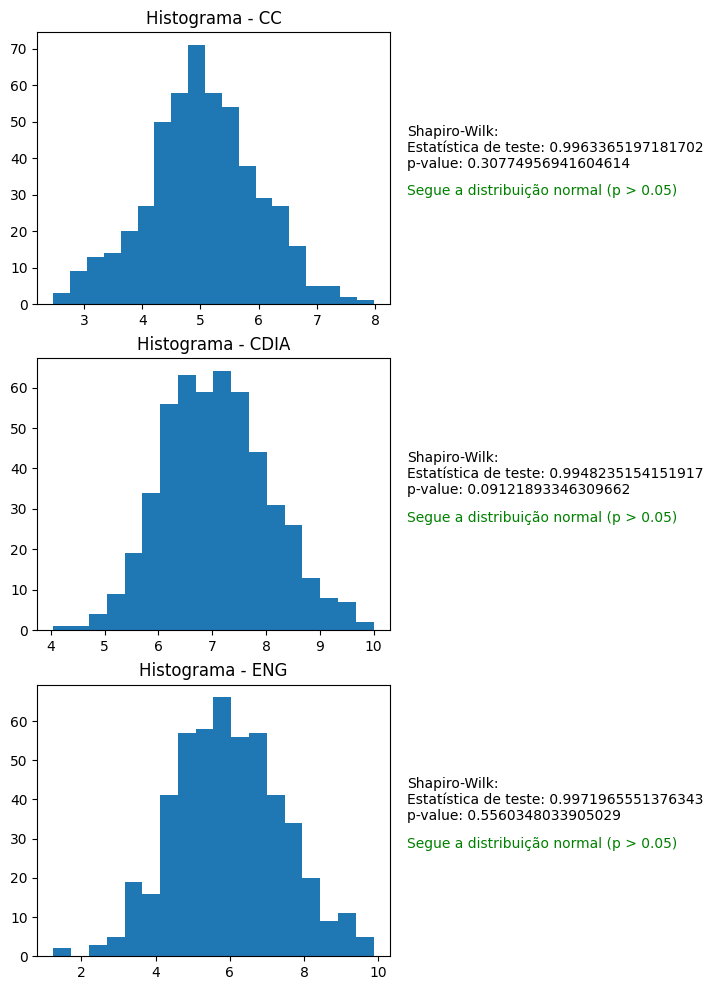

In [14]:
def plotagem(data, title, row):

    #histograma
    ax1 = plt.subplot(3, 2, 2*row-1)
    ax1.hist(data, bins='auto')
    ax1.set_title(f"Histograma - {title}")

    #s-w para normalidade
    stat, p = stats.shapiro(data)

    #textos >ao lado< do histograma
    ax1.text(1.05, 0.5, f"Shapiro-Wilk:\nEstatística de teste: {stat}\np-value: {p}", fontsize=10, transform=ax1.transAxes)
    if p > 0.05:
        ax1.text(1.05, 0.4, "Segue a distribuição normal (p > 0.05)", fontsize=10, transform=ax1.transAxes, color='green')
    else:
        ax1.text(1.05, 0.4, "Não segue a distribuição normal (p <= 0.05)", fontsize=10, transform=ax1.transAxes, color='red')

#ajustando tamanho do gráfico
plt.figure(figsize=(10, 12))

#plot
#usei o enumerate para organizar os valores da lista de cursos (tupla)
for i, curso in enumerate(cra, 1):
    plotagem(cra[curso], curso, i)

plt.show()

##Bcalc

In [15]:
num_variaveis1 = len(cra['CC'])
num_variaveis2 = len(cra['CDIA'])
num_variaveis3 = len(cra['ENG'])

n_i = num_variaveis1 + num_variaveis2 + num_variaveis3
print("Numero total de Amostras: ", n_i)

media1 = sum(cra['CC'])/num_variaveis1
media2 = sum(cra['CDIA'])/num_variaveis2
media3 = sum(cra['ENG'])/num_variaveis3

#soma do quadrado das diferenças
soma_qua_dif1 = sum((x - media1)**2 for x in cra['CC'])
soma_qua_dif2 = sum((x - media2)**2 for x in cra['CDIA'])
soma_qua_dif3 = sum((x - media3)**2 for x in cra['ENG'])

#variancia amostral
variancia1 = soma_qua_dif1 / (num_variaveis1-1)
variancia2 = soma_qua_dif2 / (num_variaveis2-1)
variancia3 = soma_qua_dif3 / (num_variaveis3-1)

#log da variancia
resultado = np.log(variancia1)
resultado2 = np.log(variancia2)
resultado3 = np.log(variancia3)

#grau de liberdade
grau_lib = num_variaveis1-1
grau_lib2 = num_variaveis2-1
grau_lib3 = num_variaveis3-1

#s_p^2
s_p2 = grau_lib*variancia1
s_p2_2 = grau_lib*variancia2
s_p2_3 = grau_lib*variancia3

#variancia agrupada
var_agrup = (s_p2 + s_p2_2 + s_p2_3)/(n_i - k)

#bcalc
q = (n_i - k) * np.log(var_agrup) - (len(cra['CC']) - 1) * np.log(variancia1) - (len(cra['CDIA']) - 1) * np.log(variancia2) - (len(cra['ENG']) - 1) * np.log(variancia3)
c = 1 + 1/(3*(k-1)) * ((1/(len(cra['CC']) - 1) + 1/(len(cra['CDIA']) - 1) + 1/(len(cra['ENG']) - 1)) - 1/(n_i - k))
bcalc = q / c

#p-value
p = stats.chi2.sf(bcalc, k - 1)

print(f"Estatística Bartlett (Bcalc): {bcalc}, Valor-p: {p}")

#usando alpha como 0.05
if p >= 0.05:
    print("\nAceitamos H0. A variância do CRA dos alunos é a mesma para todos os três cursos")
else:
    print("\nRejeitamos H0. A variância do CRA dos alunos é diferente em pelo menos dois cursos")

Numero total de Amostras:  1500
Estatística Bartlett (Bcalc): 121.0308509650686, Valor-p: 5.22979472772144e-27

Rejeitamos H0. A variância do CRA dos alunos é diferente em pelo menos dois cursos


In [16]:
data = {
    'CC': cra['CC'],
    'CDIA': cra['CDIA'],
    'ENG': cra['ENG']
}

df = pd.DataFrame(data)

desvio_padrao= df.std()
variancias = df.var()
tam_amostra = df.count()

df.loc['Desvio-padrão'] = desvio_padrao
df.loc['Variância'] = variancias
df.loc['Tamanho da amostra'] = tam_amostra

print("\nTabela de CRA por Cursos:\n")
print(df)


Tabela de CRA por Cursos:

                            CC        CDIA         ENG
0                     4.726339    7.623625    6.082274
1                     5.575657    8.819842    5.041765
2                     6.045563    5.700054    5.680169
3                     4.342202    6.936859    6.336021
4                     5.624865    7.692951    8.598046
...                        ...         ...         ...
498                   5.173200    7.223630    4.923723
499                   3.392455    6.366695    5.817007
Desvio-padrão         0.945328    0.990910    1.460641
Variância             0.893644    0.981902    2.133472
Tamanho da amostra  500.000000  500.000000  500.000000

[503 rows x 3 columns]


##Teste automatico

In [17]:
statistic, p_value = stats.bartlett(cra['CC'], cra['CDIA'], cra['ENG'])

print("Estatística do Teste de Bartlett:", statistic)
print("Valor-p (p-value):", p_value)

if p_value <= 0.05:
    print("H0 foi rejeitada. As variâncias das amostras não são iguais.")
else:
    print("H0 não foi rejeitada. As variâncias das amostras podem ser consideradas iguais.")


Estatística do Teste de Bartlett: 121.03085096506848
Valor-p (p-value): 5.229794727721742e-27
H0 foi rejeitada. As variâncias das amostras não são iguais.


##tabela

In [20]:
data = {
    'Método': ['automatico', 'feito a mão'],
    'Estatística': [statistic, bcalc],
    'Valor-p': [p_value, p]
}

df = pd.DataFrame(data)
df

,Método,Estatística,Valor-p
0,automatico,121.030851,5.229795e-27
1,feito a mão,121.030851,5.229795e-27
